<a href="https://colab.research.google.com/github/gauravgulia26/DataScience_Toolkit/blob/master/ScalingSplitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import numpy as np
import pandas as pd

In [101]:
tnsr = np.random.randint(1,1000,800)

In [102]:
norm = (tnsr - np.min(tnsr)) / (np.max(tnsr) - np.min(tnsr))

In [103]:
standard = (tnsr - np.mean(tnsr)) / np.std(tnsr)

In [104]:
scale = np.linspace(1,100,800)

<Axes: >

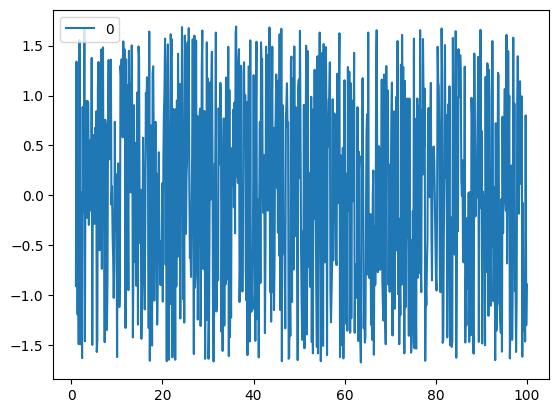

In [105]:
pd.DataFrame(pd.Series(data=standard,index=scale)).plot(kind='line')

<Axes: >

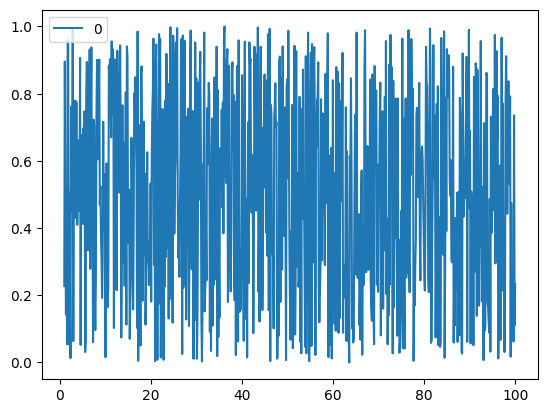

In [106]:
pd.DataFrame(pd.Series(data=norm,index=scale)).plot(kind='line')

In [107]:
# Standardisation Should be prefered

In [108]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [109]:
# fit
# fit_transform

In [110]:
# Splitting the data -> Training Set and Testing Set

In [111]:
df = sns.load_dataset('titanic')

In [112]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [113]:
X = df.drop(columns='survived')
Y = df['survived']

In [114]:
# X -> Independent Variables/Labels/Features
# Y -> Dependent Variable/Label/Feature

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)

In [116]:
y_train

,survived
6,0
718,0
685,0
73,0
882,0
...,...
106,1
270,0
860,0
435,1


In [117]:
X.shape[0] * 0.67

596.97

In [118]:
sc = StandardScaler()

In [119]:
trial = X_train.select_dtypes(exclude=['bool','category','object']).dropna()

In [120]:
trial = sc.fit_transform(trial)

In [121]:
sc.get_feature_names_out()

array(['pclass', 'age', 'sibsp', 'parch', 'fare'], dtype=object)

In [122]:
sc.get_params()

{'copy': True, 'with_mean': True, 'with_std': True}

In [123]:
sc.mean_

array([ 2.25941423, 29.52598326,  0.5460251 ,  0.42050209, 34.84936318])

In [124]:
sc.n_samples_seen_

478

In [125]:
sc.var_

array([6.90026435e-01, 2.08580202e+02, 9.67546962e-01, 7.24851631e-01,
       3.08080649e+03])

In [126]:
sc.scale_

array([ 0.8306783 , 14.44230597,  0.98363965,  0.85138219, 55.50501319])

In [127]:
# Use fit_transform with x_train
# Use Transform only never fit_transform with x_test
# Never Scale Y
# Always scale after splitting
# Always do the scaling

sc.transform(X_test.select_dtypes(exclude=['bool','category','object']).dropna())

array([[-0.31229205,  0.10206242, -0.55510685, -0.4939052 , -0.43868764],
       [ 0.89154342, -0.6595888 , -0.55510685, -0.4939052 , -0.48507984],
       [-0.31229205, -1.62896308, -0.55510685,  0.68065543, -0.03331885],
       ...,
       [ 0.89154342,  0.75985211, -0.55510685, -0.4939052 , -0.48823271],
       [ 0.89154342, -1.97516818, -0.55510685,  1.85521606, -0.34425112],
       [ 0.89154342, -0.59034778, -0.55510685, -0.4939052 , -0.48507984]])